In [ ]:
ops['tau'] = (1.25 + 1.5) / 2 # timescale of sensor (in seconds), used for deconvolution kernel. 1.25-1.5 for GCaMP6s
ops['fs'] = 30 # sampling rate
ops['aspect'] = 796 / 264 # aspect ratio for visualization in GUI
ops['batch_size'] = 1000 # takes RAM. can still increase given what i've observed 2021-01-25
ops['sparse_mode'] = True
ops['threshold_scaling'] = 0.7 # how much the ROIs have to stand out from the noise to be detected

In [13]:
# provide an h5 path in 'h5py' or a tiff path in 'data_path'
# db overwrites any ops (allows for experiment specific settings)
db = {
      'h5py': '//duhs-user-nc1.dhe.duke.edu/dusom_glickfeldlab/All_Staff/home/lan/Data/2P_images/i1322/200803/002/002_000_000.h5', # a single h5 file path
      'h5py_key': ['data'],
      'look_one_level_down': False, # whether to look in ALL subfolders when searching for tiffs
      'data_path': [], # a list of folders with tiffs (or folder of folders with tiffs if look_one_level_down is True, or subfolders is not empty)
                                            
#       'subfolders': [], # choose subfolders of 'data_path' to look in (optional)
#       'fast_disk': 'C:/BIN', # string which specifies where the binary file will be stored (should be an SSD)
    }

opsEnd = run_s2p(ops=ops, db=db)

{'h5py': '//duhs-user-nc1.dhe.duke.edu/dusom_glickfeldlab/All_Staff/home/lan/Data/2P_images/i1322/200803/002/002_000_000.h5', 'h5py_key': ['data'], 'look_one_level_down': False, 'data_path': []}
h5
time 1384.58 sec. Wrote 99999 frames per binary for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
----------- REGISTRATION
registering 99999 frames
Reference frame, 191.36 sec.
Registered 4000/99999 in 1003.51s
Registered 8000/99999 in 1715.63s
Registered 12000/99999 in 2320.95s
Registered 16000/99999 in 2961.89s
Registered 20000/99999 in 3282.81s
Registered 24000/99999 in 3652.80s
Registered 28000/99999 in 4017.18s
Registered 32000/99999 in 4391.82s
Registered 36000/99999 in 4742.32s
Registered 40000/99999 in 5062.40s
Registered 44000/99999 in 5371.21s
Registered 48000/99999 in 5682.89s
Registered 52000/99999 in 6013.14s
Registered 56000/99999 in 6383.34s
Registered

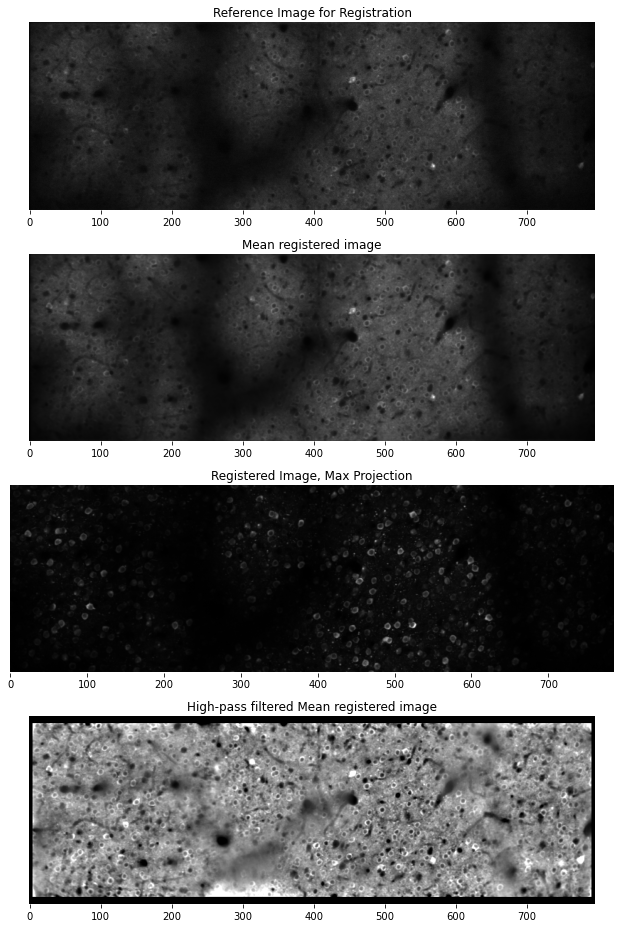

In [23]:
output_op = opsEnd

plt.subplot(4, 1, 1)
plt.imshow(output_op['refImg'], cmap='gray', )
plt.title("Reference Image for Registration");

plt.subplot(4, 1, 3)
plt.imshow(output_op['max_proj'], cmap='gray')
plt.title("Registered Image, Max Projection");

plt.subplot(4, 1, 2)
plt.imshow(output_op['meanImg'], cmap='gray')
plt.title("Mean registered image")

plt.subplot(4, 1, 4)
plt.imshow(output_op['meanImgE'], cmap='gray')
plt.title("High-pass filtered Mean registered image");

plt.tight_layout()

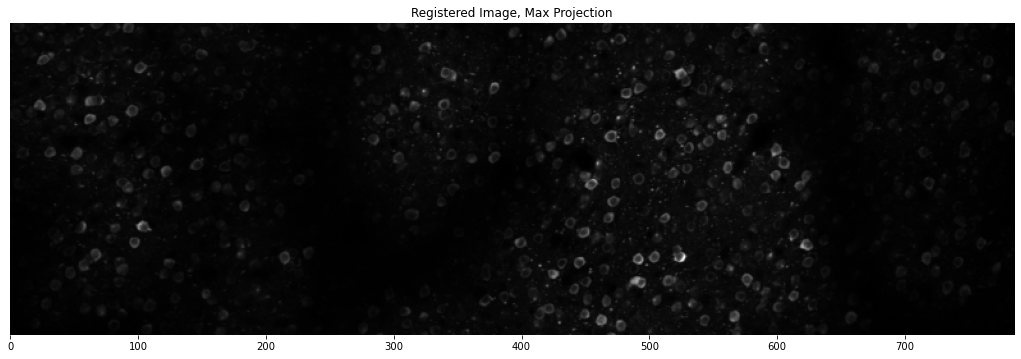

In [24]:
plt.imshow(output_op['max_proj'], cmap='gray')
plt.title("Registered Image, Max Projection");

In [25]:
stats_file = Path(output_op['save_path']).joinpath('stat.npy')
iscell = np.load(Path(output_op['save_path']).joinpath('iscell.npy'), allow_pickle=True)[:, 0].astype(bool)
stats = np.load(stats_file, allow_pickle=True)
stats.shape, iscell.shape # adjusted ops increased cell num from 2867 to 4349

((4349,), (4349,))

C:\Users\lan\anaconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: All-NaN slice encountered
  """Entry point for launching an IPython kernel.


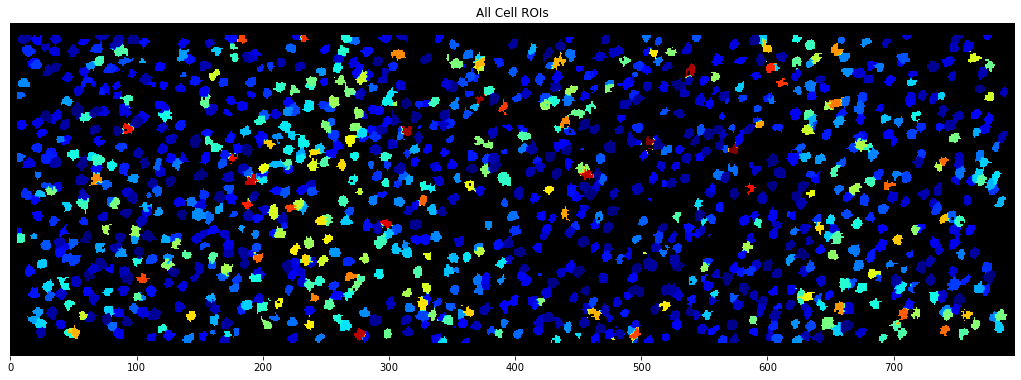

In [27]:
plt.imshow(np.nanmax(im[iscell], axis=0), cmap='jet')
plt.title("All Cell ROIs");

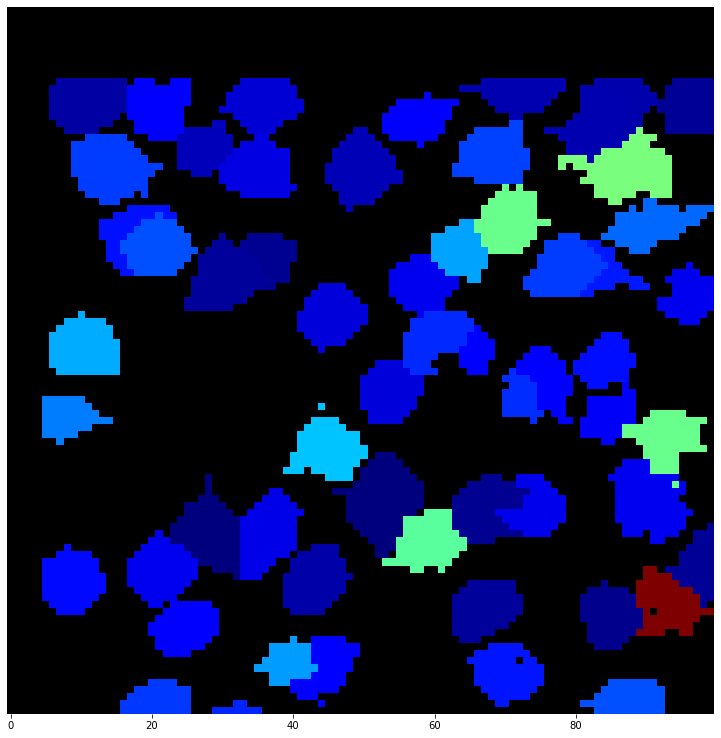

In [29]:
plt.imshow(tt[:100,:100], cmap='jet')

C:\Users\lan\anaconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: All-NaN slice encountered
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'All Non-Cell ROIs')

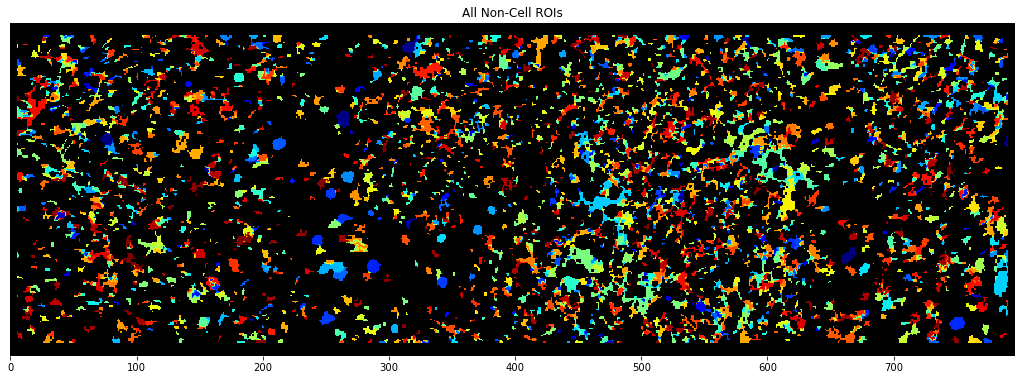

In [31]:
plt.imshow(np.nanmax(im[~iscell], axis=0, ), cmap='jet')
plt.title("All Non-Cell ROIs")

## Compare segmentation btw suite2p vs imCellEditInteractive in singleChannelTC_FS_LL.m

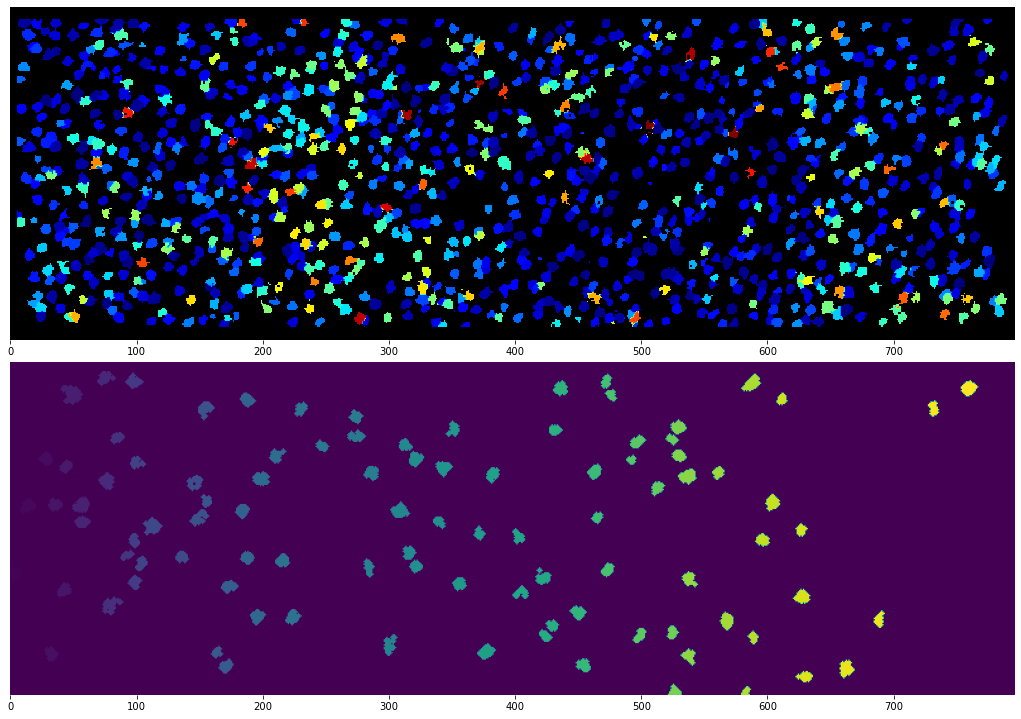

In [42]:
plt.subplot(2, 1, 1)
plt.imshow(segment_suite2p, cmap='jet')
plt.subplot(2, 1, 2)
plt.imshow(segment_ref['mask_cell'])

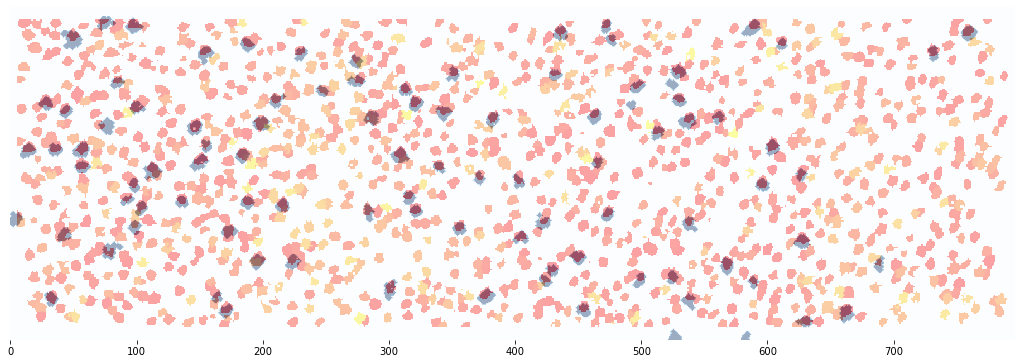

In [71]:
segment_suite2p_flat = segment_suite2p.copy()
# segment_suite2p_flat[segment_suite2p_flat>0] = 1 + np.random.normal(0, 500, len(segment_suite2p_flat[segment_suite2p_flat>0]))
segment_ref_flat = segment_ref['mask_cell'].copy()
segment_ref_flat[segment_ref_flat>0] = 1

im1 = plt.imshow(segment_suite2p_flat, cmap='autumn', alpha=0.6)
im2 = plt.imshow(segment_ref_flat, cmap='Blues', alpha=0.4)
plt.show()

In [ ]:
'''next step: 

adjust ops further: tune ROI detection to ensure inclusion of cells responsive to our stim
- spatial_scale: (int, default: 0), what the optimal scale of the recording is in pixels: 0 (auto detect), 1 (=6 pixels), 2 (=12 pixels), 3 (=24 pixels), or 4 (=48 pixels)
- train classifier_user.npy or set no classifier: ops['preclassify'] = 0.0 (apply classifier before signal extraction with probability threshold of “preclassify”. If this is set to 0.0, then all detected ROIs are kept and signals are computed)

more datasets (from V1 & LM & LI?) to ensure overlap

confirm function by calculating correlation of fluo trace of overlapping "cell ROIs". negative control: shuffled data
'''